# Khai báo thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# If your charts have some problems, let see libraries version in requirements.txt based on Python 3.10.
# Uncomment to install libraries by command:
# !pip install -r requirements.txt

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 320 # 100 dpi hơi mờ nhé, chuẩn đăng bài Fanpage là từ 320dpi rồi.

Đọc dữ liệu

In [4]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test = pd.read_csv('../data/test_preprocessed.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,121.00,324


In [6]:
# all_data = pd.concat((train, test)).reset_index(drop=True)
all_data = train

# Khám phá dữ liệu

## Độ tuổi của mọi người

In [7]:
age_data = all_data[['age', 'Target']].copy()
age_data['bin_age'] = age_data['age']
age_data.loc[age_data['age'] <= 12, 'bin_age'] = '0 - 12 tuổi'
age_data.loc[(age_data['age'] > 12) & (age_data['age'] <= 18), 'bin_age'] = '13 - 18 tuổi'
age_data.loc[(age_data['age'] > 18) & (age_data['age'] < 65), 'bin_age'] = '19 - 64 tuổi'
age_data.loc[age_data['age'] >= 65, 'bin_age'] = '65+ tuổi'
age_data.sample(5)

,age,Target,bin_age
5485,74,4,65+ tuổi
6955,27,4,19 - 64 tuổi
1276,29,4,19 - 64 tuổi
1996,32,4,19 - 64 tuổi
1955,47,4,19 - 64 tuổi


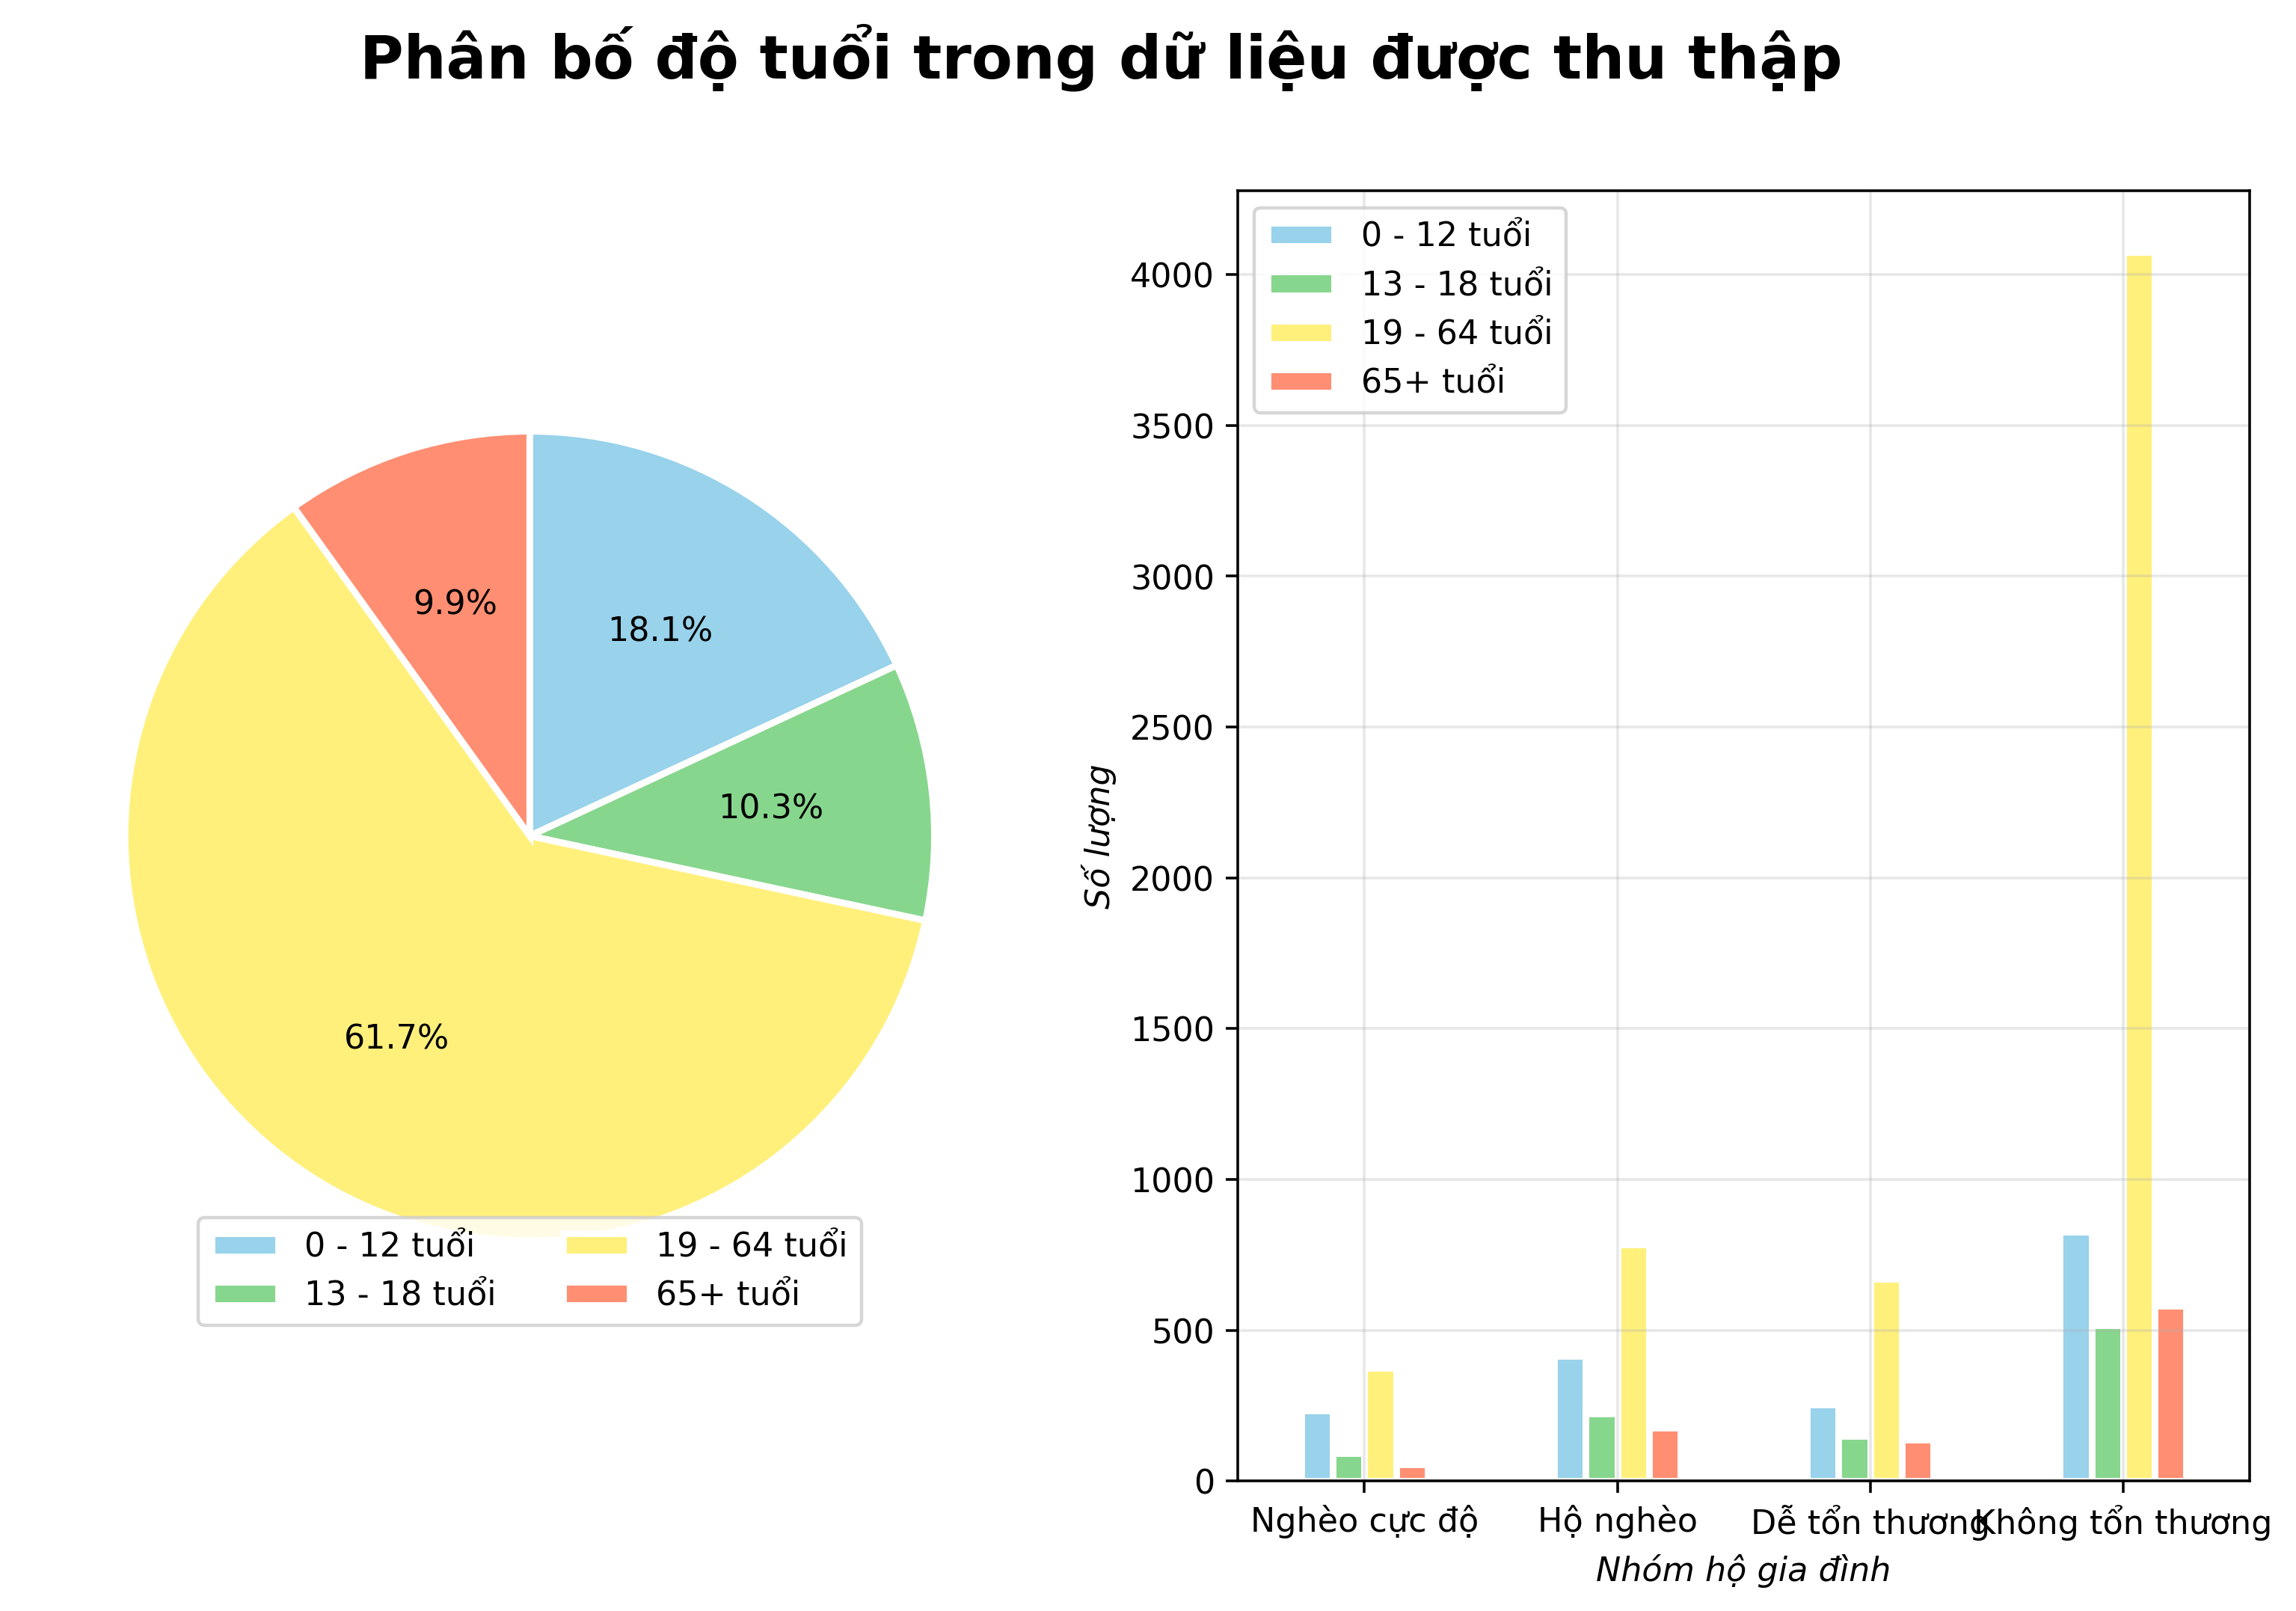

In [8]:
color_lst = ['#98d2eb', '#87D68D', '#fff07c', '#FF8E72']

# Plot the bar chart and pie chart in the same subplot for 'age' column
fig, (ax_pie, ax_bar) = plt.subplots(1, 2)

age_count = age_data[['Target', 'bin_age']].groupby(['Target', 'bin_age']).value_counts().sort_index().to_frame(name='value')
age_count = age_count.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)
age_count.columns = age_count.columns.droplevel(1)
age_count.plot(kind='bar', ax=ax_bar, color=color_lst, edgecolor='white', linewidth=2);
ax_bar.set_xlabel('Nhóm hộ gia đình', style='italic'); ax_bar.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_bar.set_ylabel('Số lượng', style='italic');
ax_bar.grid(alpha=0.3);

age_count = age_data['bin_age'].value_counts().sort_index().to_frame(name='value')
ax_pie.pie(age_count.value,
           labels=age_count.index, labeldistance=None,
           colors=color_lst,
           wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
           autopct='%1.1f%%', pctdistance=.6,
           startangle=90, counterclock=False);
ax_pie.legend(loc='lower center', ncol=2);

plt.suptitle('Phân bố độ tuổi trong dữ liệu được thu thập', weight='bold', fontsize=18);

**Nhận xét**:
- _Sự phân bố_: Đối tượng được thu thập phổ biến từ 19 đến 64 tuổi, hơn $60\%$, là đối tượng có nguồn thu nhập chính trong các hộ gia đình, cho thấy đối tượng này cần quan tâm để xem xét yếu tố hộ gia đình có cần sự trợ giúp từ chương trình viện trợ xã hội hay không. Phần còn lại phân bố đồng đều ở các độ tuổi khác nhau, giúp quan sát sự phụ thuộc kinh tế đối với nguồn thu nhập chính của các hộ gia đình.
- _Độ tuổi dưới 18_: Chiếm gần $30\%$ trong dữ liệu thu thập. Đây là độ tuổi mà trẻ em bắt đầu được tiếp cận với hệ thống giáo dục phổ thông. Trong đó, tỷ lệ trẻ em dưới 12 tuổi, độ tuổi mà trẻ em bắt đầu đi học tiểu học chiếm khoảng $18\%$, tỷ lệ trẻ em trên 12 tuổi, độ tuổi trẻ em bắt đầu hoàn thành chương trình giáo dục tiểu học và chuyển sang giáo dục trung học phổ thông chiếm khoảng $10\%$. Giữa 2 nhóm tuổi này không có sự chênh lệch quá lớn.
- _Độ tuổi trên 65_: Chiếm khoảng $10\%$ trong dữ liệu thu thập, bao gồm các đối tượng bị phụ thuộc vào nguồn thu nhập chính hoặc có thể tự chủ tài chính của họ. Vậy liệu có mối quan hệ giữa sự phụ thuộc và học vấn hay không?
- _Theo phân loại nhóm gia đình_: Độ tuổi từ 19 đến 64 tuổi chiếm số lượng lớn nhất trong mỗi nhóm, là đối tượng có nguồn thu nhập chính trong các hộ gia đình, cho thấy đối tượng này cần quan tâm để xem xét yếu tố hộ gia đình có cần sự trợ giúp từ chương trình viện trợ xã hội hay không.

## Độ tuổi dưới 18

In [9]:
columns = np.array([col for col in all_data.columns if 'instlevel' in col])
columns = np.append(columns, ['age', 'escolari' , 'rez_esc', 'Target'])
columns

array(['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4',
       'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8',
       'instlevel9', 'age', 'escolari', 'rez_esc', 'Target'], dtype='<U10')

In [10]:
under_18 = all_data[all_data['age'] <= 18][columns].copy()
under_18.rez_esc = under_18.rez_esc.astype(int)
under_18.sample(5)

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,age,escolari,rez_esc,Target
815,1,0,0,0,0,0,0,0,0,7,0,0,1
962,1,0,0,0,0,0,0,0,0,5,0,0,4
8004,0,0,0,1,0,0,0,0,0,13,7,0,2
5543,0,0,0,1,0,0,0,0,0,14,7,0,3
3858,0,1,0,0,0,0,0,0,0,12,5,0,3


### Phổ cập giáo dục trẻ em

In [11]:
under_18_statistical = under_18[['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'age']].copy()
under_18_statistical = under_18_statistical.groupby('age').sum()
under_18_statistical['Tiểu học'] = under_18_statistical['instlevel2'] + under_18_statistical['instlevel3']
under_18_statistical['Trung học phổ thông'] = under_18_statistical['instlevel4'] + under_18_statistical['instlevel5']
under_18_statistical['Trung học kỹ thuật'] = under_18_statistical['instlevel6'] + under_18_statistical['instlevel7']

under_18_statistical.rename(columns={'instlevel1': 'Không trình độ học vấn'}, inplace=True)
under_18_statistical = under_18_statistical.drop(['instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7'], axis=1)
under_18_statistical['Tổng cộng'] = under_18_statistical.sum(axis=1)

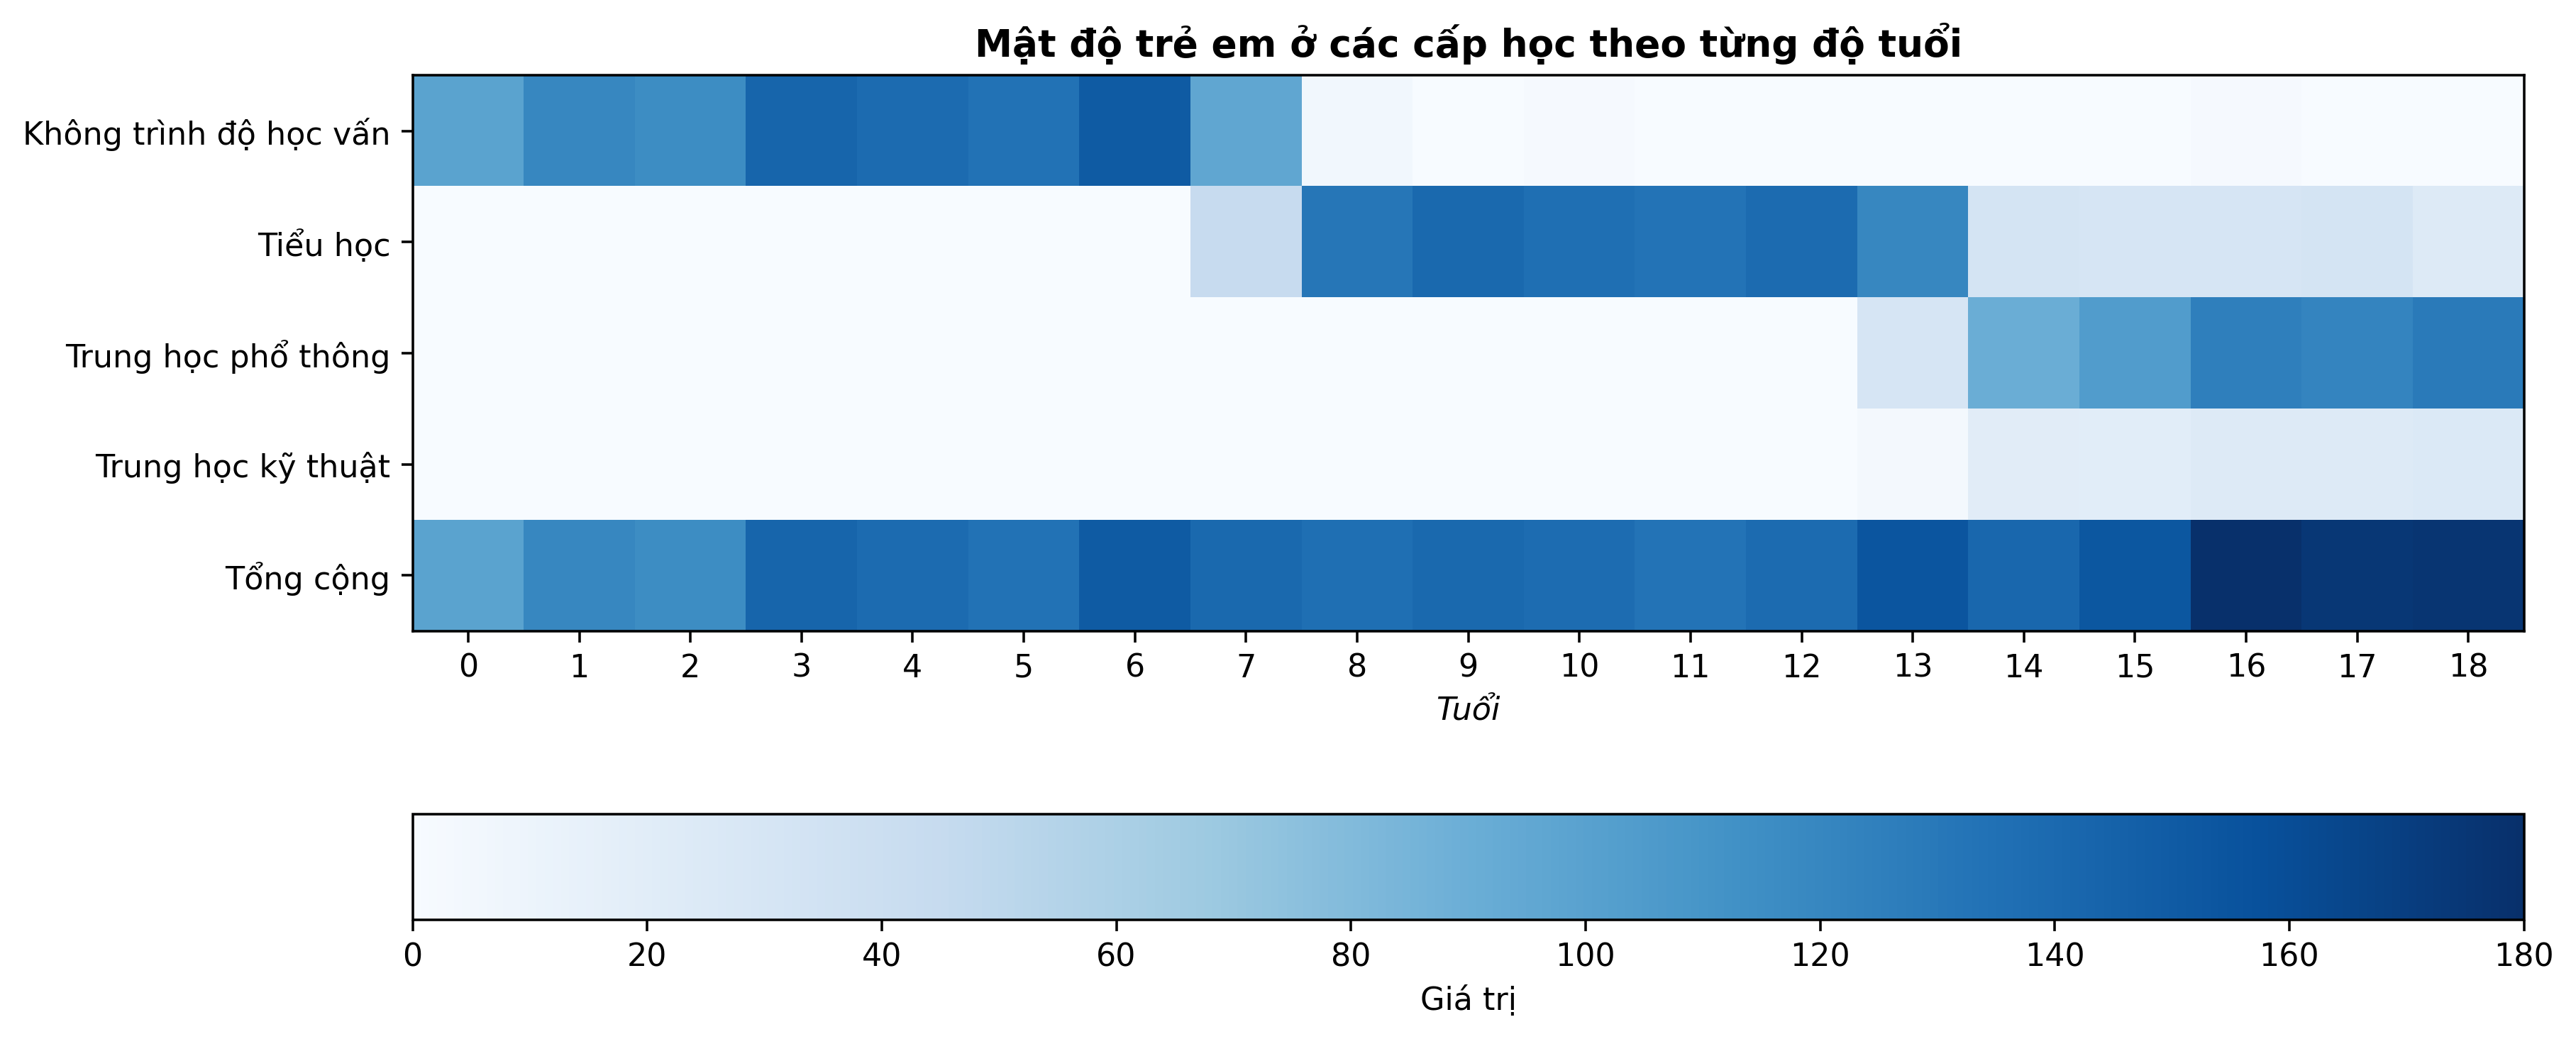

In [12]:
# Plot heatmap for under_18_statistical
plt.imshow(under_18_statistical.T, cmap='Blues')
plt.colorbar(orientation='horizontal', label='Giá trị');
plt.xticks(np.arange(len(under_18_statistical.index)), under_18_statistical.index);
plt.xlabel('Tuổi', style='italic');
plt.yticks(np.arange(len(under_18_statistical.columns)), under_18_statistical.columns);
plt.title('Mật độ trẻ em ở các cấp học theo từng độ tuổi', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy số lượng trẻ em đa số được phân bố đồng đều ở mỗi độ tuổi.
- Mỗi trình độ học vấn nằm trong một khoảng độ tuổi nhất định:
    + **_Không trình độ học vấn_**: Nằm trong khoảng từ 0 đến 6 tuổi, độ tuổi này trẻ em có thể tự chọn giáo dục mầm non (không bắt buộc) hoặc ở nhà. Ngoài ra, còn một số trẻ trên 7 tuổi vẫn chưa được đi học, đây có thể là các hộ gia đình gặp khó khăn về kinh tế hoặc chưa có hiểu biết về giáo dục.
    + **_Tiểu học_**: Đa số phân bố trong khoảng từ 7 đến 13 tuổi, ngoài ra một số ít phân bố ở độ tuổi 6 hoặc lớn hơn 13. Điều này cho thấy rằng độ tuổi bắt đầu đến trường của trẻ em Costa Rica là 6, tuy nhiên lại không quá phổ biến ở độ tuổi này, suy ra phần lớn đối tượng được thu thập dữ liệu ở Costa Rica bắt đầu học tiểu học bị muộn hơn so với quy định. Bên cạnh đó, từ biểu đồ có thể thấy gần về độ tuổi 18 vẫn còn một số ít trẻ em chưa hoàn thành giáo dục tiểu học, cho thấy có thể tồn tại việc bỏ học xảy ra ở trẻ em Costa Rica.
    + **_Trung học_**: Vì ảnh hưởng của độ tuổi bắt đầu đi học trễ hơn nên ta thấy phân bố của cấp học này chủ yếu từ 14 tuổi trở đi, và một số ít phân bố ở độ tuổi 13. Bên cạnh đó, thông tin thú vị ta có thể thấy, trẻ em Costa Rica khi bước vào cấp học trung học (trên 12 tuổi - thông tin nhóm tìm hiểu về giáo dục Costa Rica) có 2 sự lựa chọn: trung học phổ thông hoặc trường nghề. Phần lớn trẻ em ở Costa Rica lựa chọn trung học phổ thông, chỉ số ít trẻ em lựa chọn trường nghề.
- Từ biểu đồ, ta thấy càng cấp học cao, độ tuổi trẻ em càng lớn.

### Sự tiếp cận giáo dục trễ ở trẻ em

In [13]:
delayed_enrollment = under_18.loc[under_18['age'] > 6, ['age', 'rez_esc']].copy()
delayed_enrollment.loc[delayed_enrollment['rez_esc'] > 0, 'rez_esc'] = 1
delayed_enrollment = delayed_enrollment.groupby('age').sum()

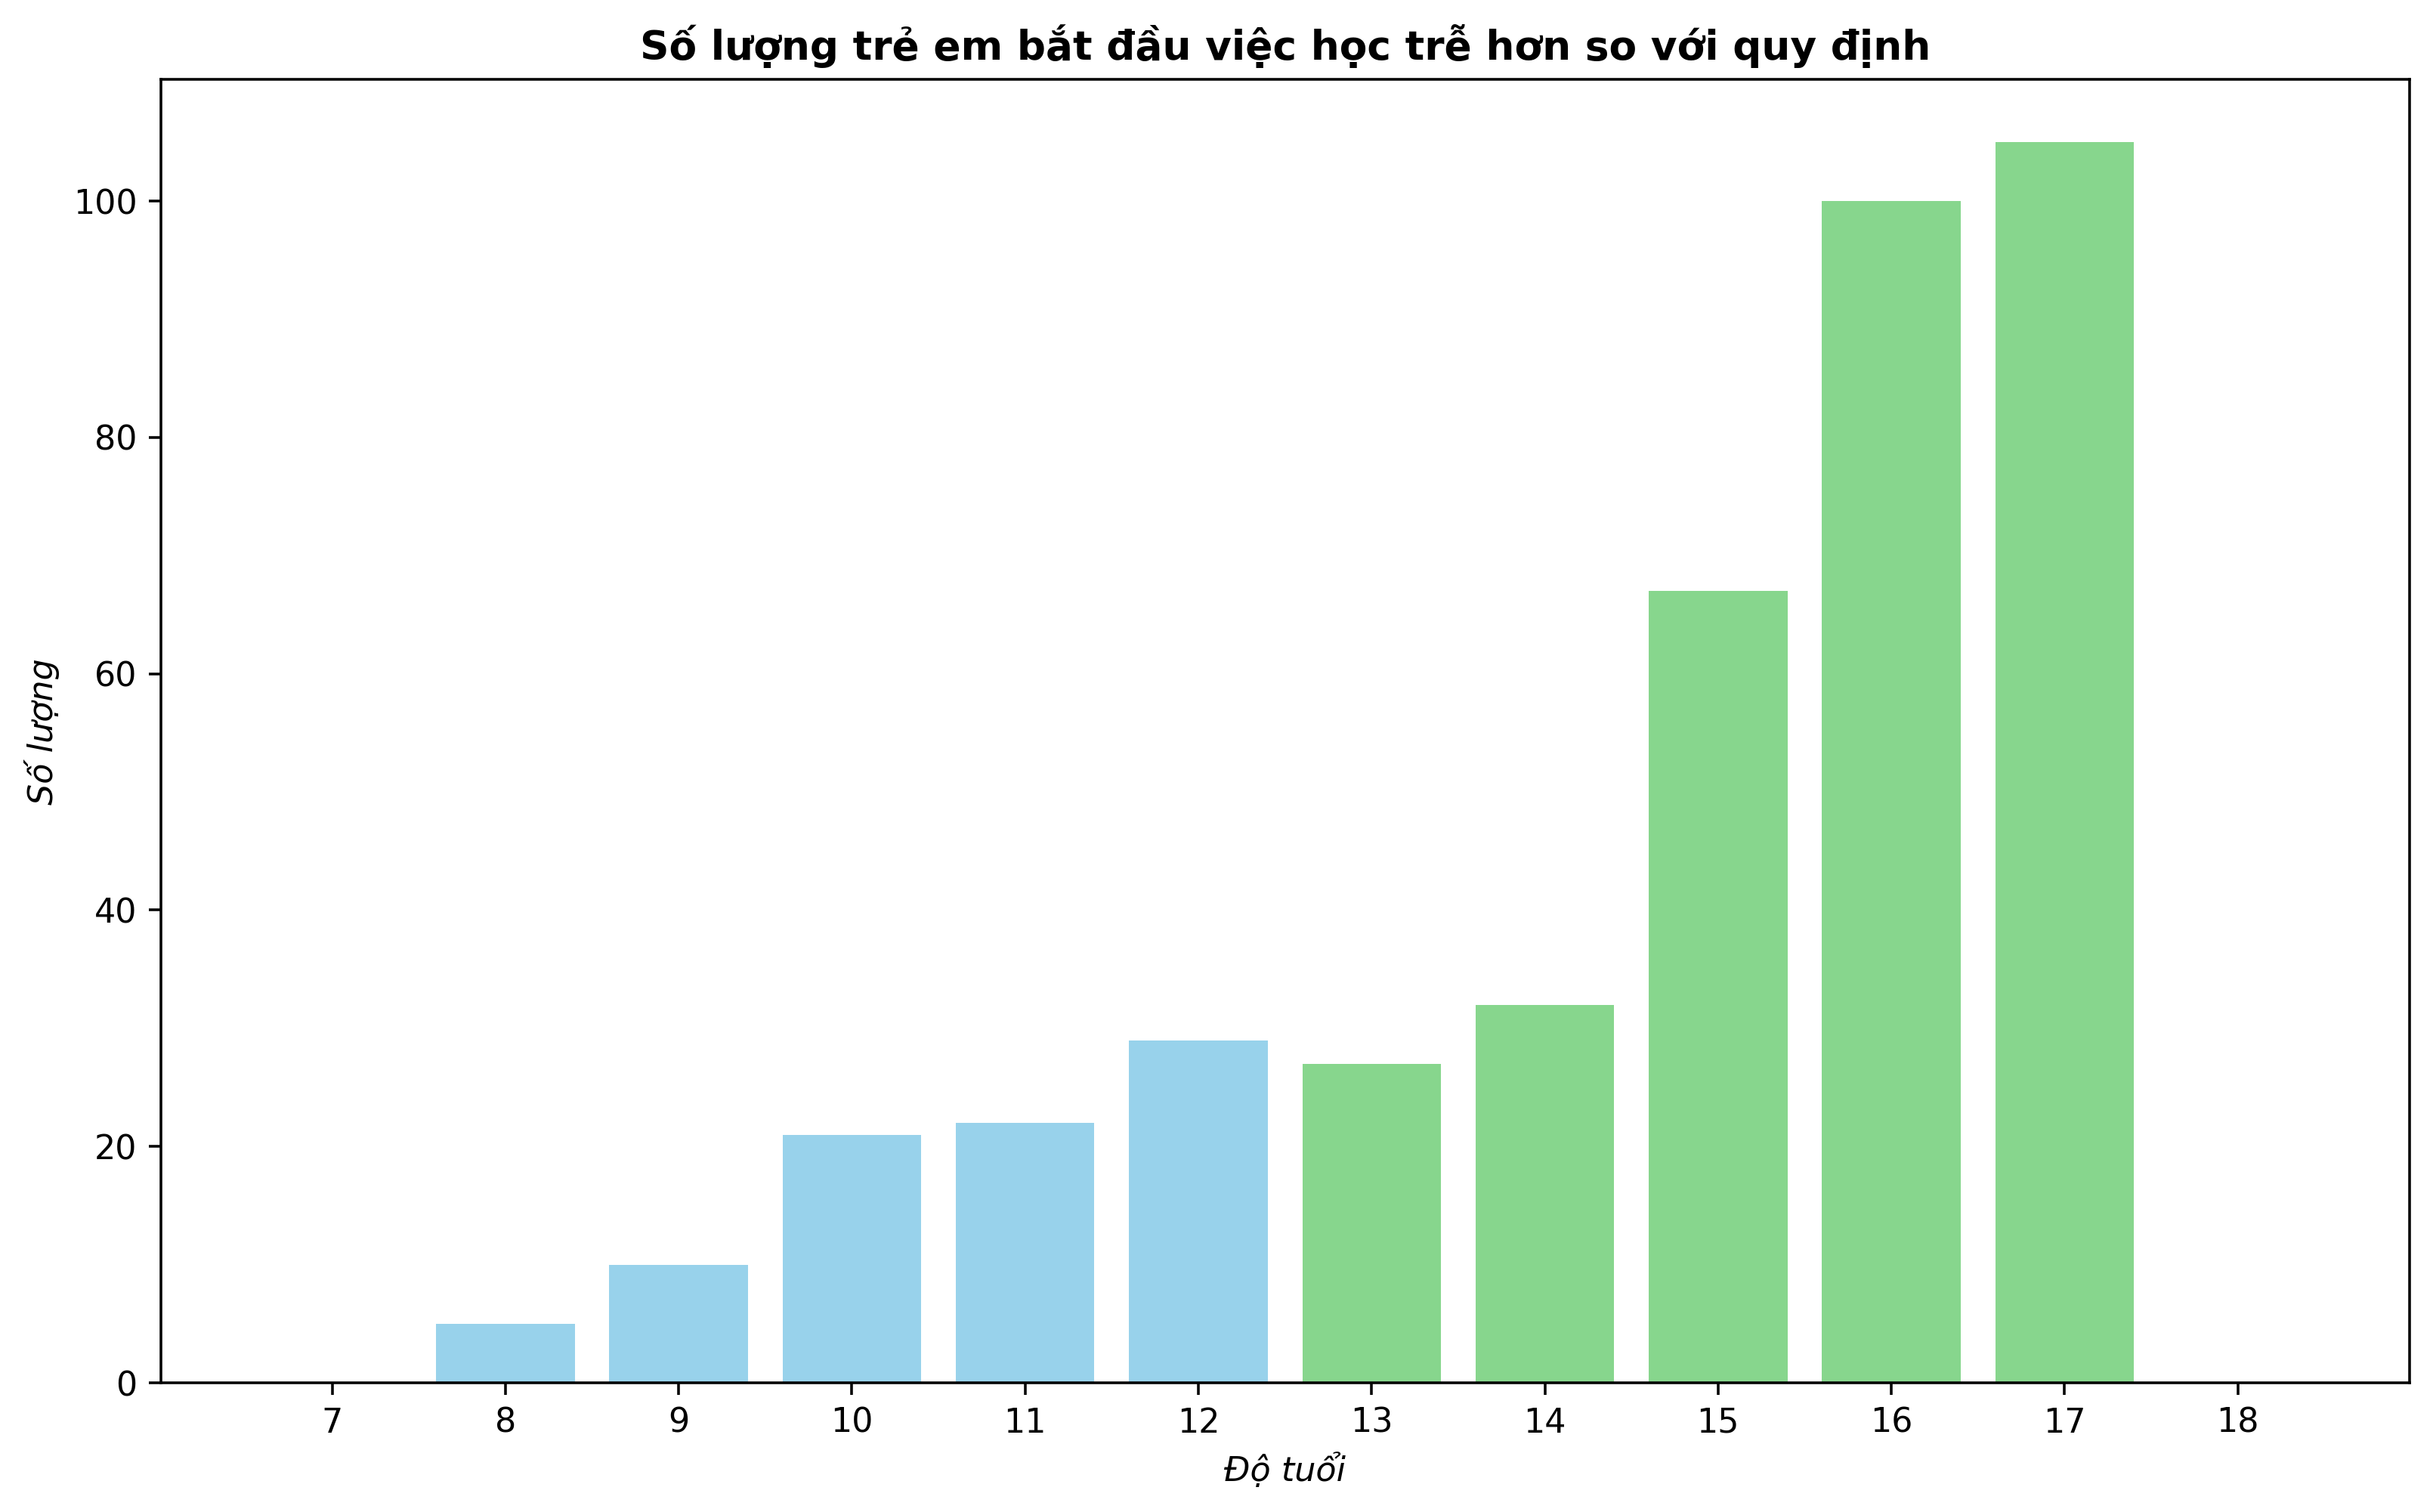

In [14]:
color_lst = ['#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb',
             '#87D68D', '#87D68D', '#87D68D', '#87D68D', '#87D68D', '#87D68D',]
plt.bar(delayed_enrollment.index, delayed_enrollment.rez_esc, color=color_lst)
plt.xlabel('Độ tuổi', style='italic')
plt.xticks(delayed_enrollment.index)
plt.ylabel('Số lượng', style='italic')
plt.title('Số lượng trẻ em bắt đầu việc học trễ hơn so với quy định', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy độ tuổi càng lớn, càng có nhiều trẻ em bắt đầu tiếp cận giáo dục trễ hơn so với thông thường. Điều này cho thấy rằng các hộ gia đình gần đây có xu hướng cho trẻ em tiếp cận giáo dục đúng độ tuổi quy định.
- Kết hợp quan sát biểu đồ trước đó, ta thấy trẻ em ở độ tuổi 18 mà vẫn đang ở cấp Tiểu học hầu hết đều đã bỏ học.

### Sự chưa được tiếp cận giáo dục ở trẻ em

In [15]:
non_enrollment = under_18.loc[under_18['age'] > 6, ['age', 'escolari']].copy()
non_enrollment.loc[non_enrollment['escolari'] == 0, 'escolari'] = -1
non_enrollment.loc[non_enrollment['escolari'] > 0, 'escolari'] = 0
non_enrollment['escolari'] *= -1
non_enrollment = non_enrollment.groupby('age').sum()

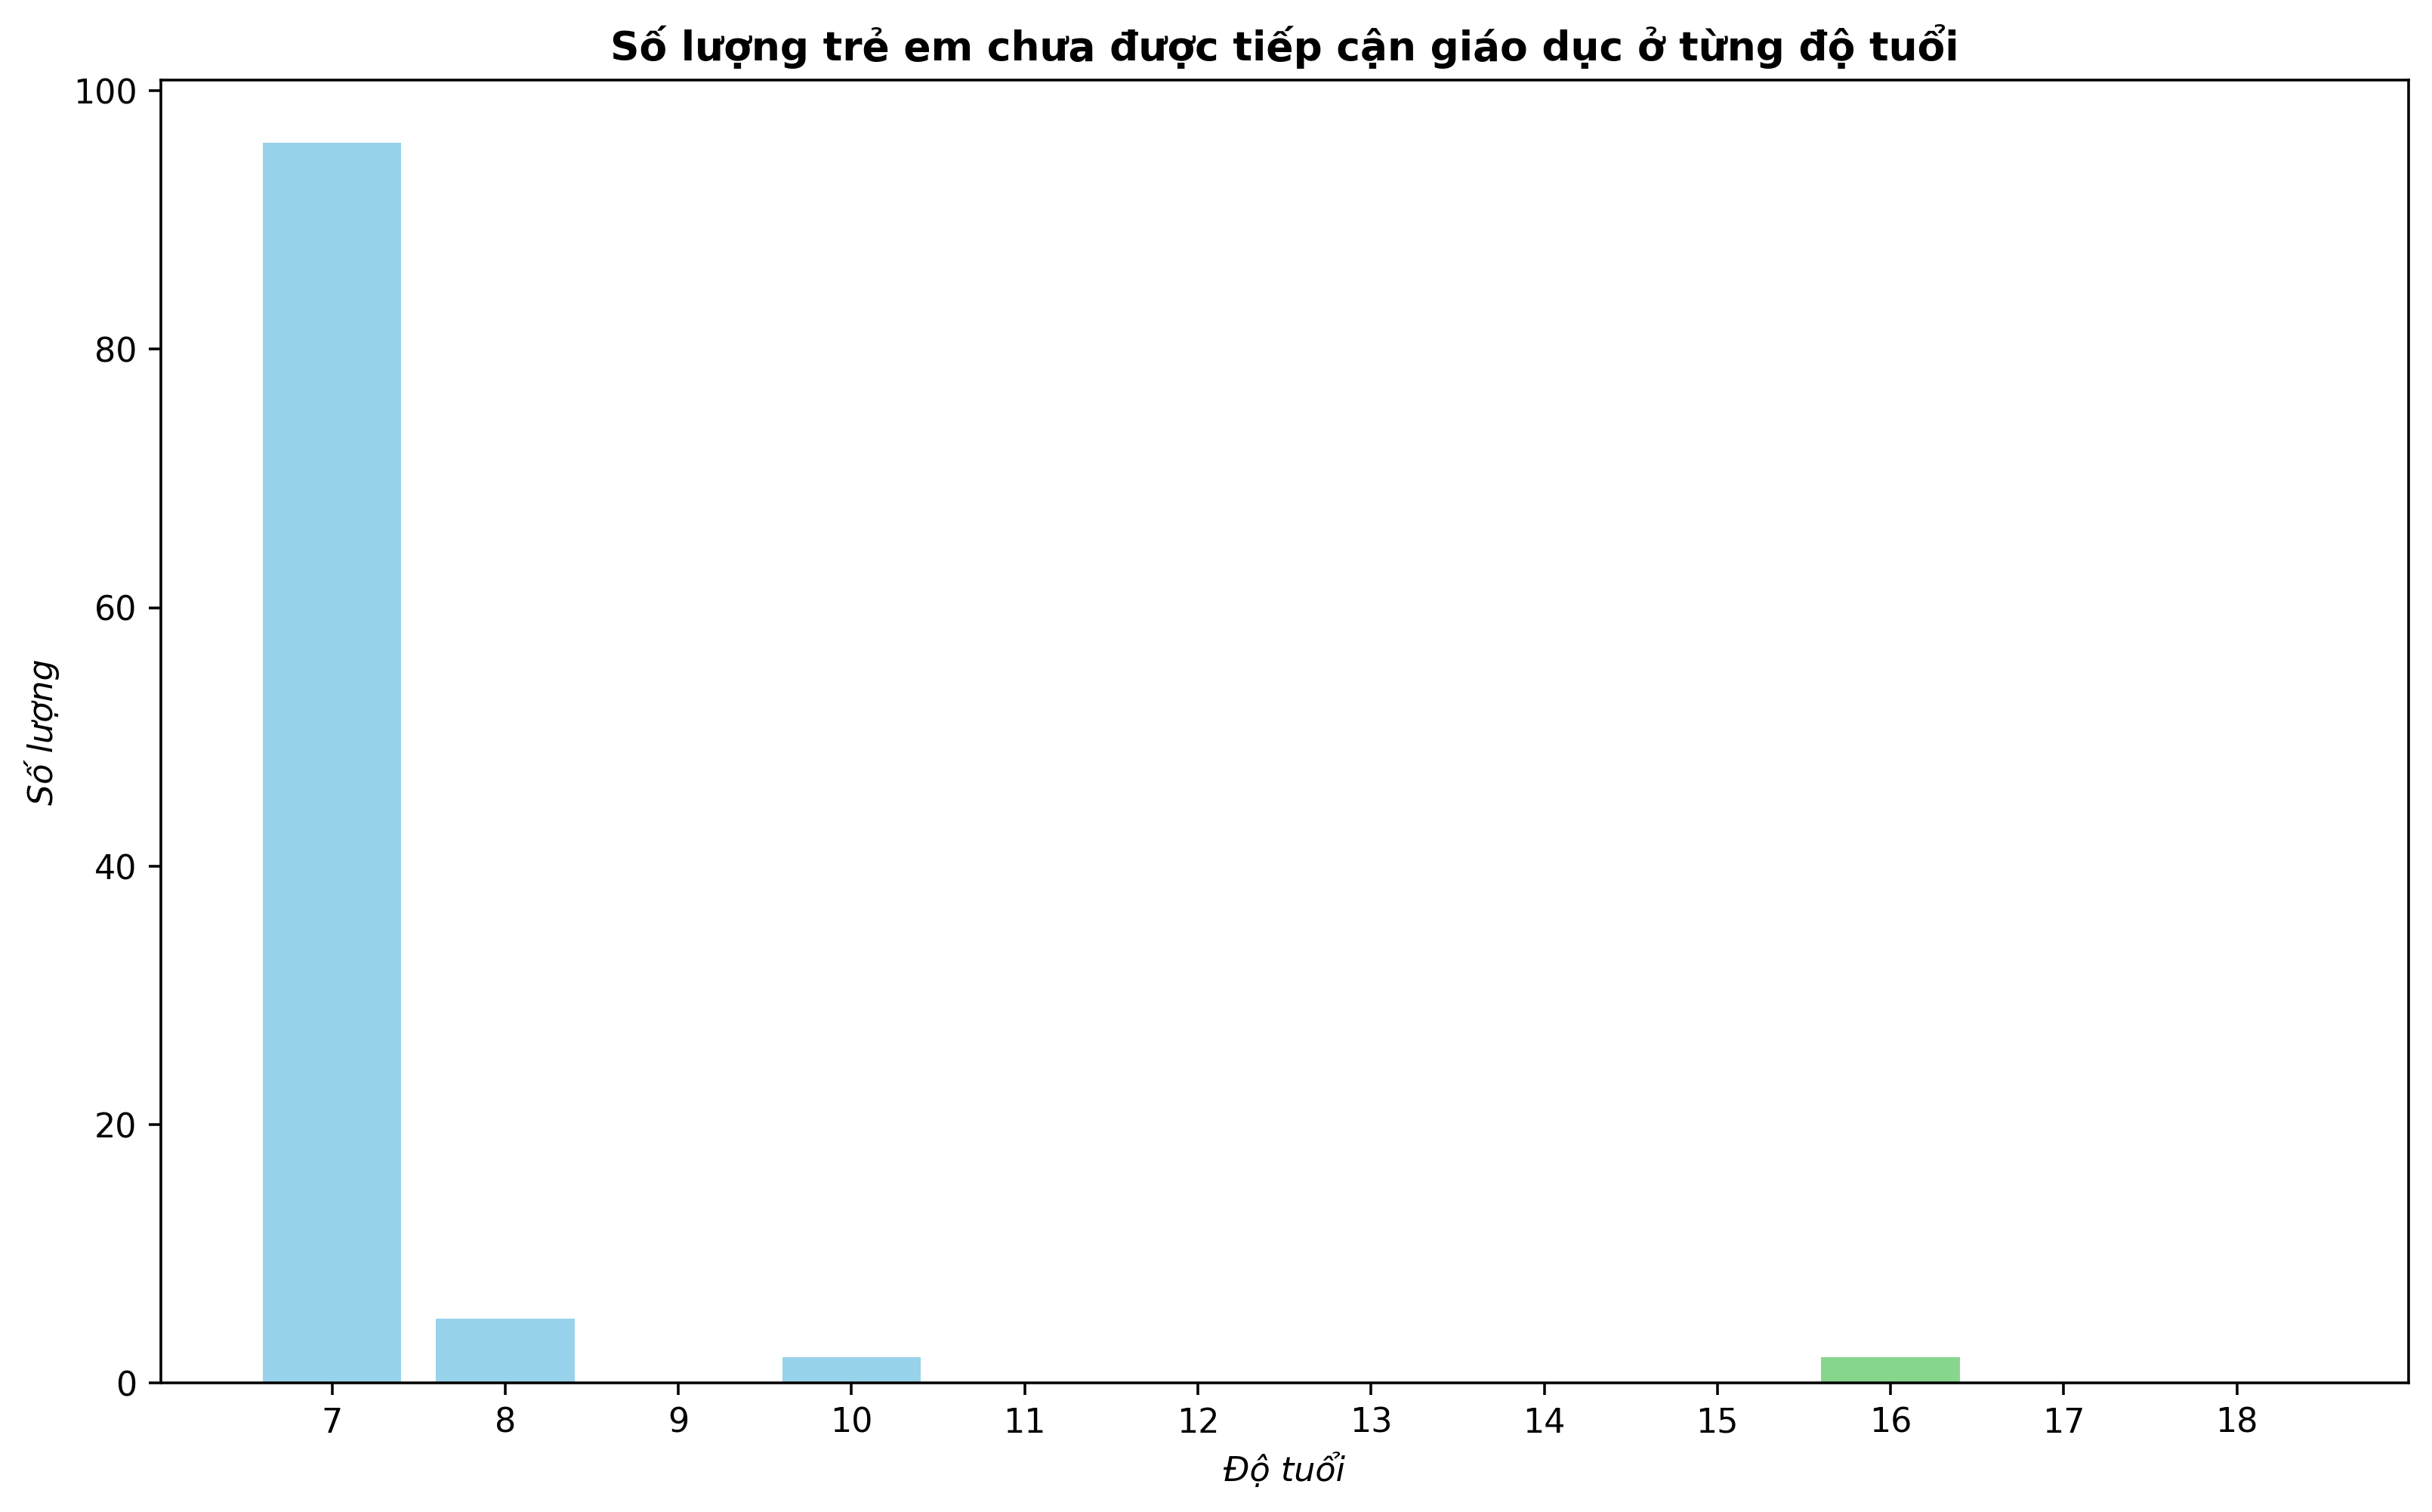

In [16]:
# Plot bar chart for non_enrollment
plt.bar(non_enrollment.index, non_enrollment.escolari, color=color_lst)
plt.xlabel('Độ tuổi', style='italic')
plt.xticks(non_enrollment.index)
plt.ylabel('Số lượng', style='italic')
plt.title('Số lượng trẻ em chưa được tiếp cận giáo dục ở từng độ tuổi', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy phần lớn trẻ em chưa được tiếp cận giáo dục phổ biến ở độ tuổi 7, 8. Một số ít trẻ em độ tuổi 10 và 16 cũng chưa được tiếp cận giáo dục.
- Ngoài ra, xu hướng số lượng giảm khi độ tuổi tăng, đây có thể là coi là một điều tích cực.

## Độ tuổi trên 18

In [17]:
columns = np.array(['age', 'instlevel8', 'instlevel9', 'meaneduc', 'Target'])
over_18 = all_data.loc[all_data['age'] > 18, columns].copy()

over_18['bin_age'] = over_18['age']
over_18.loc[age_data['age'] < 65, 'bin_age'] = 'Dưới 65 tuổi'
over_18.loc[over_18['age'] >= 65, 'bin_age'] = 'Trên 65 tuổi'

over_18['Target'] = over_18['Target'].astype(int)

over_18

,age,instlevel8,instlevel9,meaneduc,Target,bin_age
0,43,0,0,10.00,4,Dưới 65 tuổi
1,67,1,0,12.00,4,Trên 65 tuổi
2,92,0,0,11.00,4,Trên 65 tuổi
4,37,0,0,11.00,4,Dưới 65 tuổi
5,38,0,0,11.00,4,Dưới 65 tuổi
...,...,...,...,...,...,...
9551,67,0,0,3.00,2,Trên 65 tuổi
9552,46,0,0,8.25,2,Dưới 65 tuổi
9554,50,0,0,8.25,2,Dưới 65 tuổi
9555,26,0,0,8.25,2,Dưới 65 tuổi


### Số năm đi học trung bình của người trưởng thành

In [18]:
average_schooling = over_18[['age', 'meaneduc', 'bin_age', 'Target']].copy()
average_schooling

,age,meaneduc,bin_age,Target
0,43,10.00,Dưới 65 tuổi,4
1,67,12.00,Trên 65 tuổi,4
2,92,11.00,Trên 65 tuổi,4
4,37,11.00,Dưới 65 tuổi,4
5,38,11.00,Dưới 65 tuổi,4
...,...,...,...,...
9551,67,3.00,Trên 65 tuổi,2
9552,46,8.25,Dưới 65 tuổi,2
9554,50,8.25,Dưới 65 tuổi,2
9555,26,8.25,Dưới 65 tuổi,2


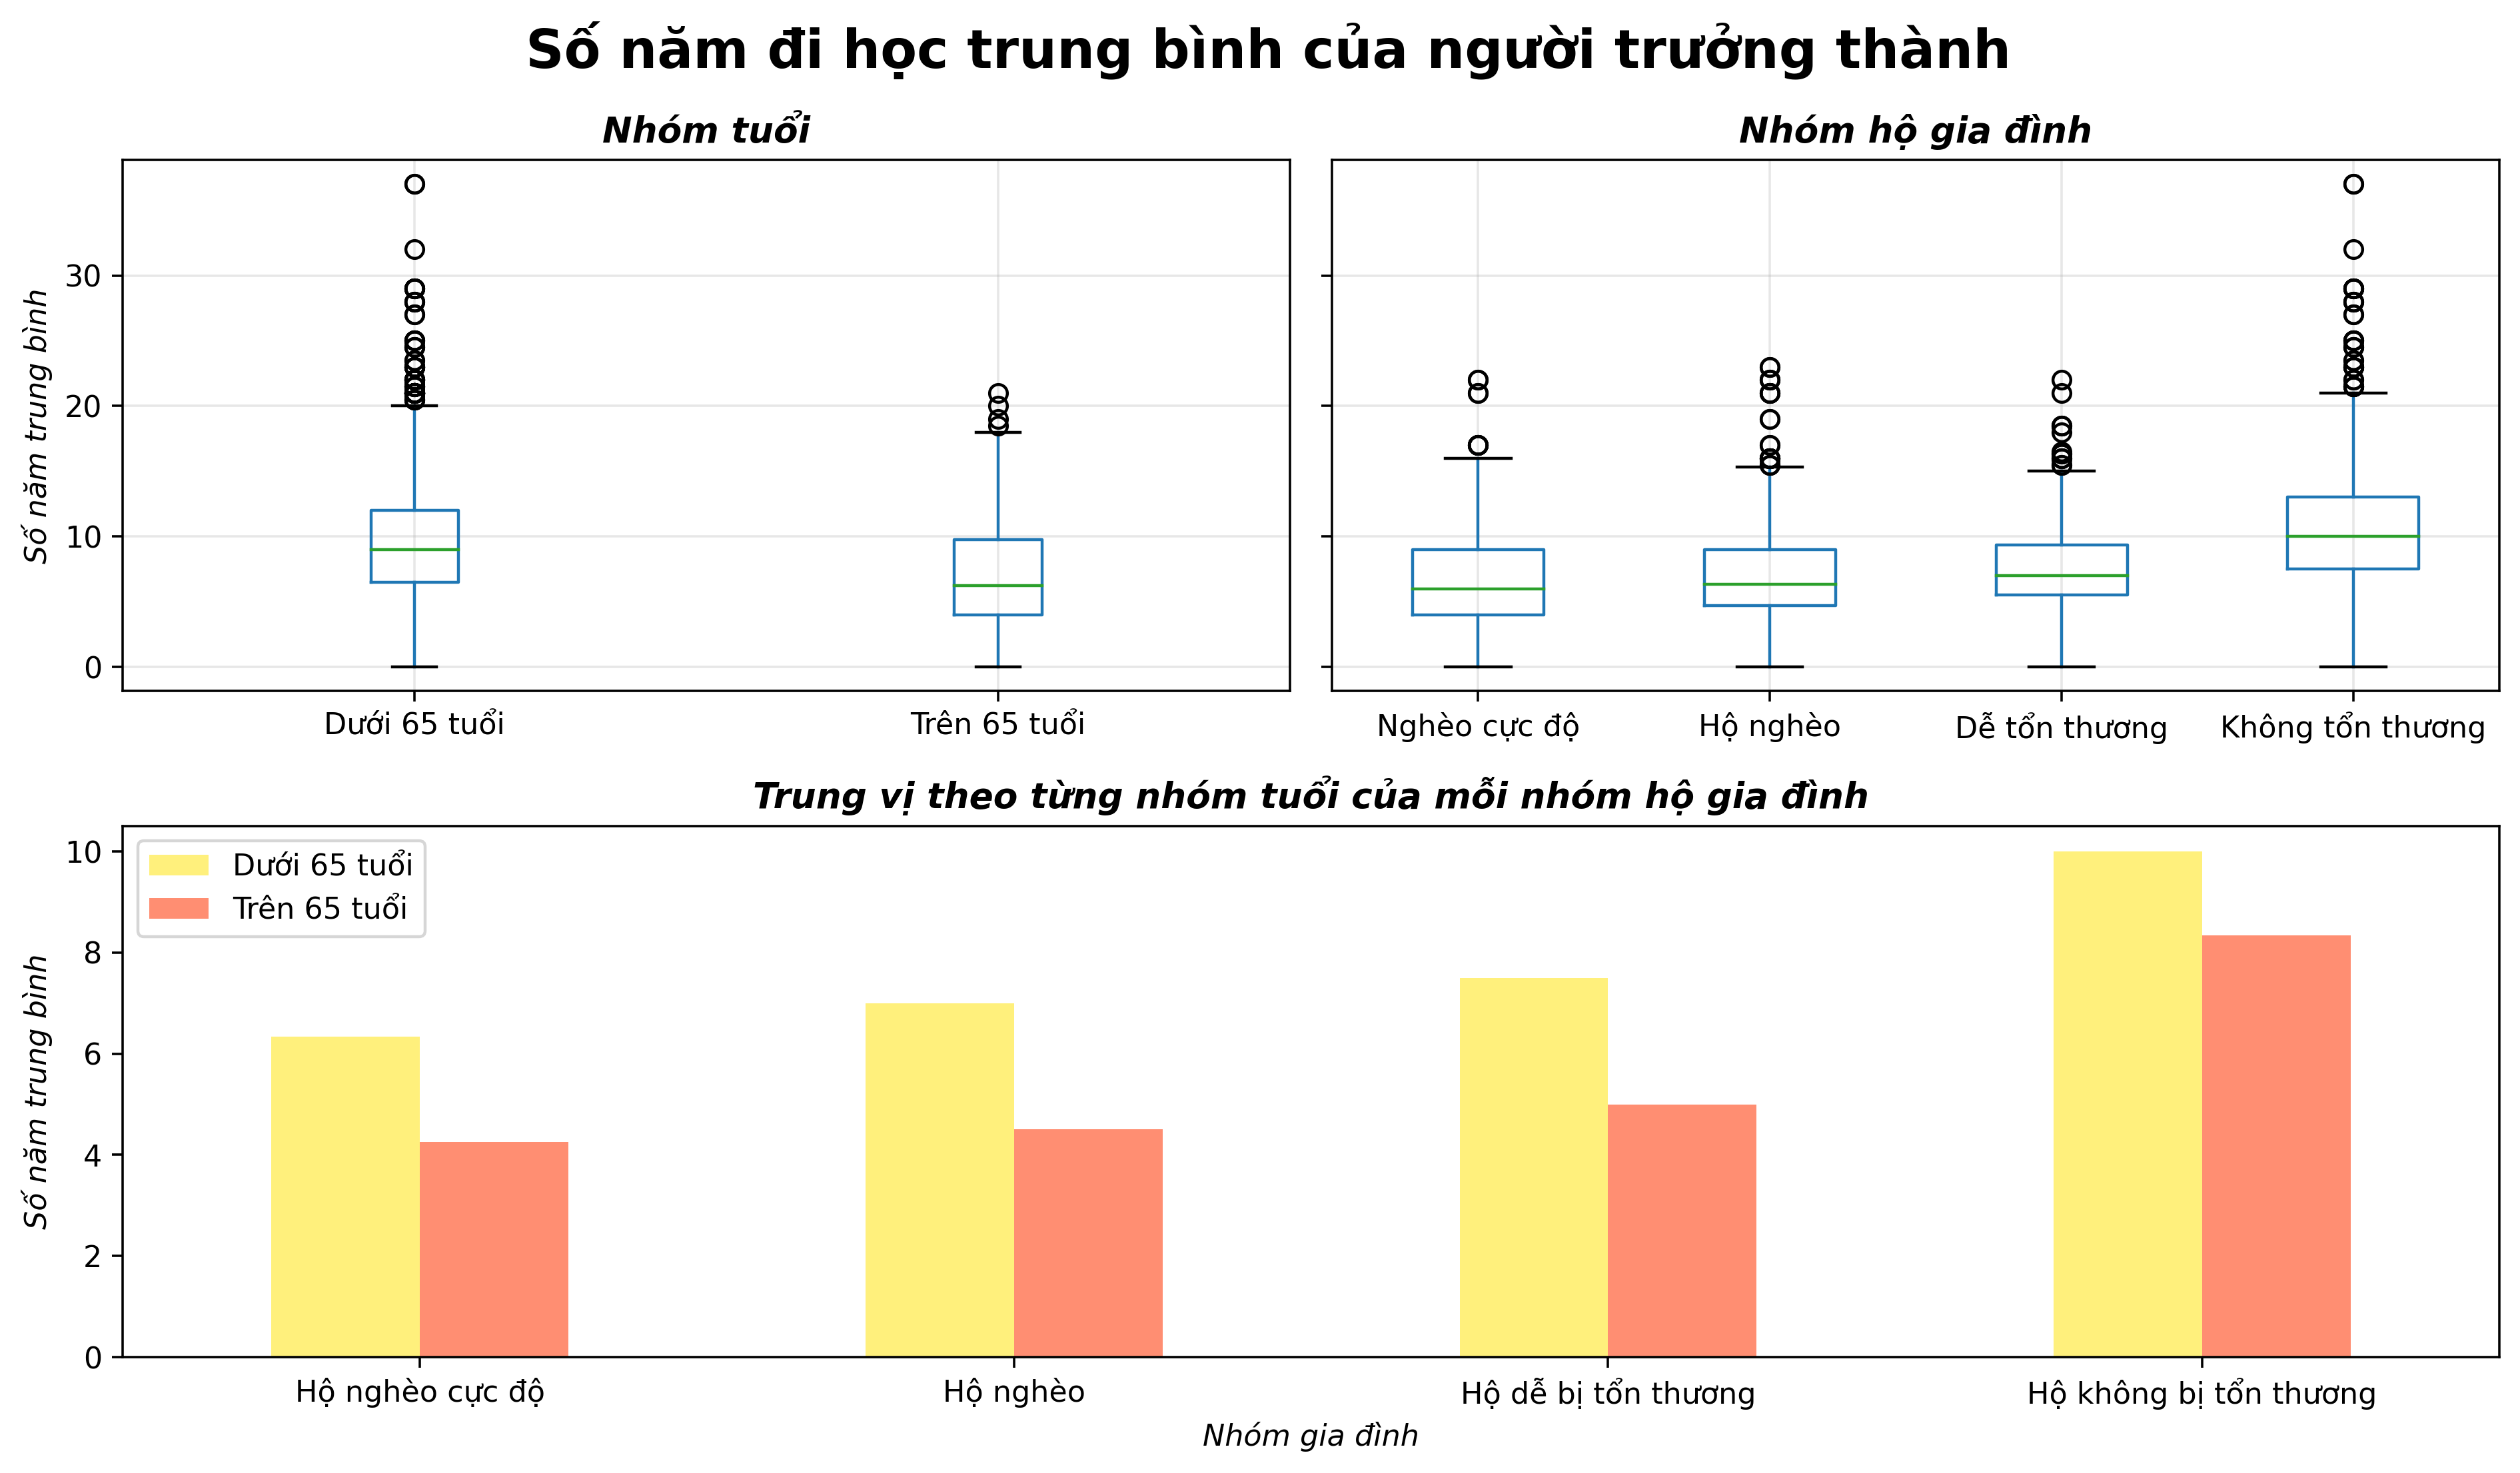

In [19]:
# Plot bar chart for 'meaneduc' with 'bin_age' and 'Target' of average_schooling
fig = plt.figure()

gs = fig.add_gridspec(2,2)
ax_left = fig.add_subplot(gs[0, 0])
ax_right = fig.add_subplot(gs[0, 1], sharey=ax_left)
ax_bottom = fig.add_subplot(gs[1, :])

# Box plot
average_schooling.boxplot(by='bin_age', column='meaneduc', ax=ax_left, grid=True);
average_schooling.boxplot(by='Target', column='meaneduc', ax=ax_right, grid=True);

plt.suptitle('Số năm đi học trung bình của người trưởng thành', weight='bold', fontsize=18);
ax_left.set_title('Nhóm tuổi',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});
ax_right.set_title('Nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_left.set_xlabel('');
ax_right.set_xlabel('');
ax_right.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_left.set_ylabel('Số năm trung bình', style='italic');

ax_left.grid(alpha=0.3);
ax_right.grid(alpha=0.3);

# Bar chart
group_schooling = average_schooling[['Target', 'bin_age', 'meaneduc']].groupby(['Target', 'bin_age']).median()
group_schooling = group_schooling.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)
group_schooling.columns = group_schooling.columns.droplevel(1)

group_schooling.plot(kind='bar', ax=ax_bottom, color=['#fff07c', '#FF8E72']);
ax_bottom.set_xlabel('Nhóm gia đình', style='italic');
ax_bottom.set_xticklabels(['Hộ nghèo cực độ', 'Hộ nghèo', 'Hộ dễ bị tổn thương', 'Hộ không bị tổn thương'], rotation=0);
ax_bottom.set_ylabel('Số năm trung bình', style='italic');
ax_bottom.set_title('Trung vị theo từng nhóm tuổi của mỗi nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

plt.tight_layout();

**Nhận xét**:
- Từ biểu đồ ta thấy số năm đi học trung bình của từng hộ gia đình đa số từ 0 đến 20 năm.
- Theo _nhóm tuổi_:
    + Số năm trung bình có xu hướng giảm khi tuổi càng lớn.
    + Số điểm giá trị ngoại lai của số năm đi học trung bình của nhóm dưới 65 tuổi có tần suất nhiều hơn so với nhóm trên 65 tuổi, giá trị ngoại lai cao nhất của số năm đi học trung bình của nhóm dưới 65 tuổi cao hơn nhiều so với nhóm trên 65 tuổi.</br>
    $\Longrightarrow$ Người trẻ ở Costa Rica có sự quan tâm và đầu tư cho học vấn của bản thân.
- Theo _nhóm hộ gia đình_: Theo chiều của mức độ phân loại nhóm gia đình (từ Nghèo cực độ đến Không bị tổn thương):
    + Số năm trung bình có xu hướng tăng.
    + Giá trị ngoại lai cao nhất của mỗi nhóm có xu hướng tăng.
- Quan sát chi tiết trên giá trị trung vị: Theo chiều của mức độ phân loại nhóm gia đình (từ Nghèo cực độ đến Không bị tổn thương):
    + Ở bất kỳ nhóm tuổi nào, trung vị của số năm đi học trung bình đều có xu hướng tăng. Cho thấy gia đình có điều kiện kinh tế ổn định có sự đầu tư về học vấn của họ.
    + Tuy nhiên, quan sát giá trị trung vị cho thấy các nhóm không có điều kiện kinh tế có trung vị khá thấp, xấp xỉ với số năm để hoàn thành bậc tiểu học mà ta đã quan sát từ biểu đồ trước. Vì vậy đây có thể là yếu tố để xem xét đánh giá mức độ cần sự hỗ trợ cho các hộ gia đình trong tương lai.

**Giải thích**: Lý do sử dụng giá trị trung vị để so sánh số năm đi học giữa các nhóm:
- Tỷ lệ phân bố/trọng số/kích thước giữa các đối tượng/nhóm đối tượng có sự chênh lệch rõ ràng.
- Median/Mean là phương pháp phù hợp hỗ trợ so sánh giữa các đối tượng/nhóm đối tượng có sự chênh lệch về kích thước cỡ mẫu.

### Lựa chọn tiếp tục việc học Đại học và cao hơn ở người trưởng thành

In [20]:
uni_and_grad = over_18[['bin_age', 'instlevel8', 'instlevel9', 'Target']].copy()
uni_and_grad['has_uni_grad'] = uni_and_grad['instlevel8'] + uni_and_grad['instlevel9']
uni_and_grad.loc[uni_and_grad['has_uni_grad'] > 0, 'has_uni_grad'] = 1
uni_and_grad.drop(columns=['instlevel8', 'instlevel9'], inplace=True)
uni_and_grad

,bin_age,Target,has_uni_grad
0,Dưới 65 tuổi,4,0
1,Trên 65 tuổi,4,1
2,Trên 65 tuổi,4,0
4,Dưới 65 tuổi,4,0
5,Dưới 65 tuổi,4,0
...,...,...,...
9551,Trên 65 tuổi,2,0
9552,Dưới 65 tuổi,2,0
9554,Dưới 65 tuổi,2,0
9555,Dưới 65 tuổi,2,0


In [21]:
sum_by_age = uni_and_grad[['bin_age', 'has_uni_grad']].groupby(['bin_age']).sum()
sum_by_age

,has_uni_grad
bin_age,
Dưới 65 tuổi,1364
Trên 65 tuổi,116


In [22]:
sum_by_target = uni_and_grad[['Target', 'has_uni_grad']].groupby(['Target']).sum()
sum_by_target

,has_uni_grad
Target,
1,19
2,50
3,59
4,1352


In [23]:
sum_group = uni_and_grad.groupby(['Target', 'bin_age']).sum()
sum_group = sum_group.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)
sum_group.columns = sum_group.columns.droplevel(1)
sum_group_pie = sum_group.T
sum_group

,Dưới 65 tuổi,Trên 65 tuổi
Target,,
1,18,1
2,47,3
3,58,1
4,1241,111


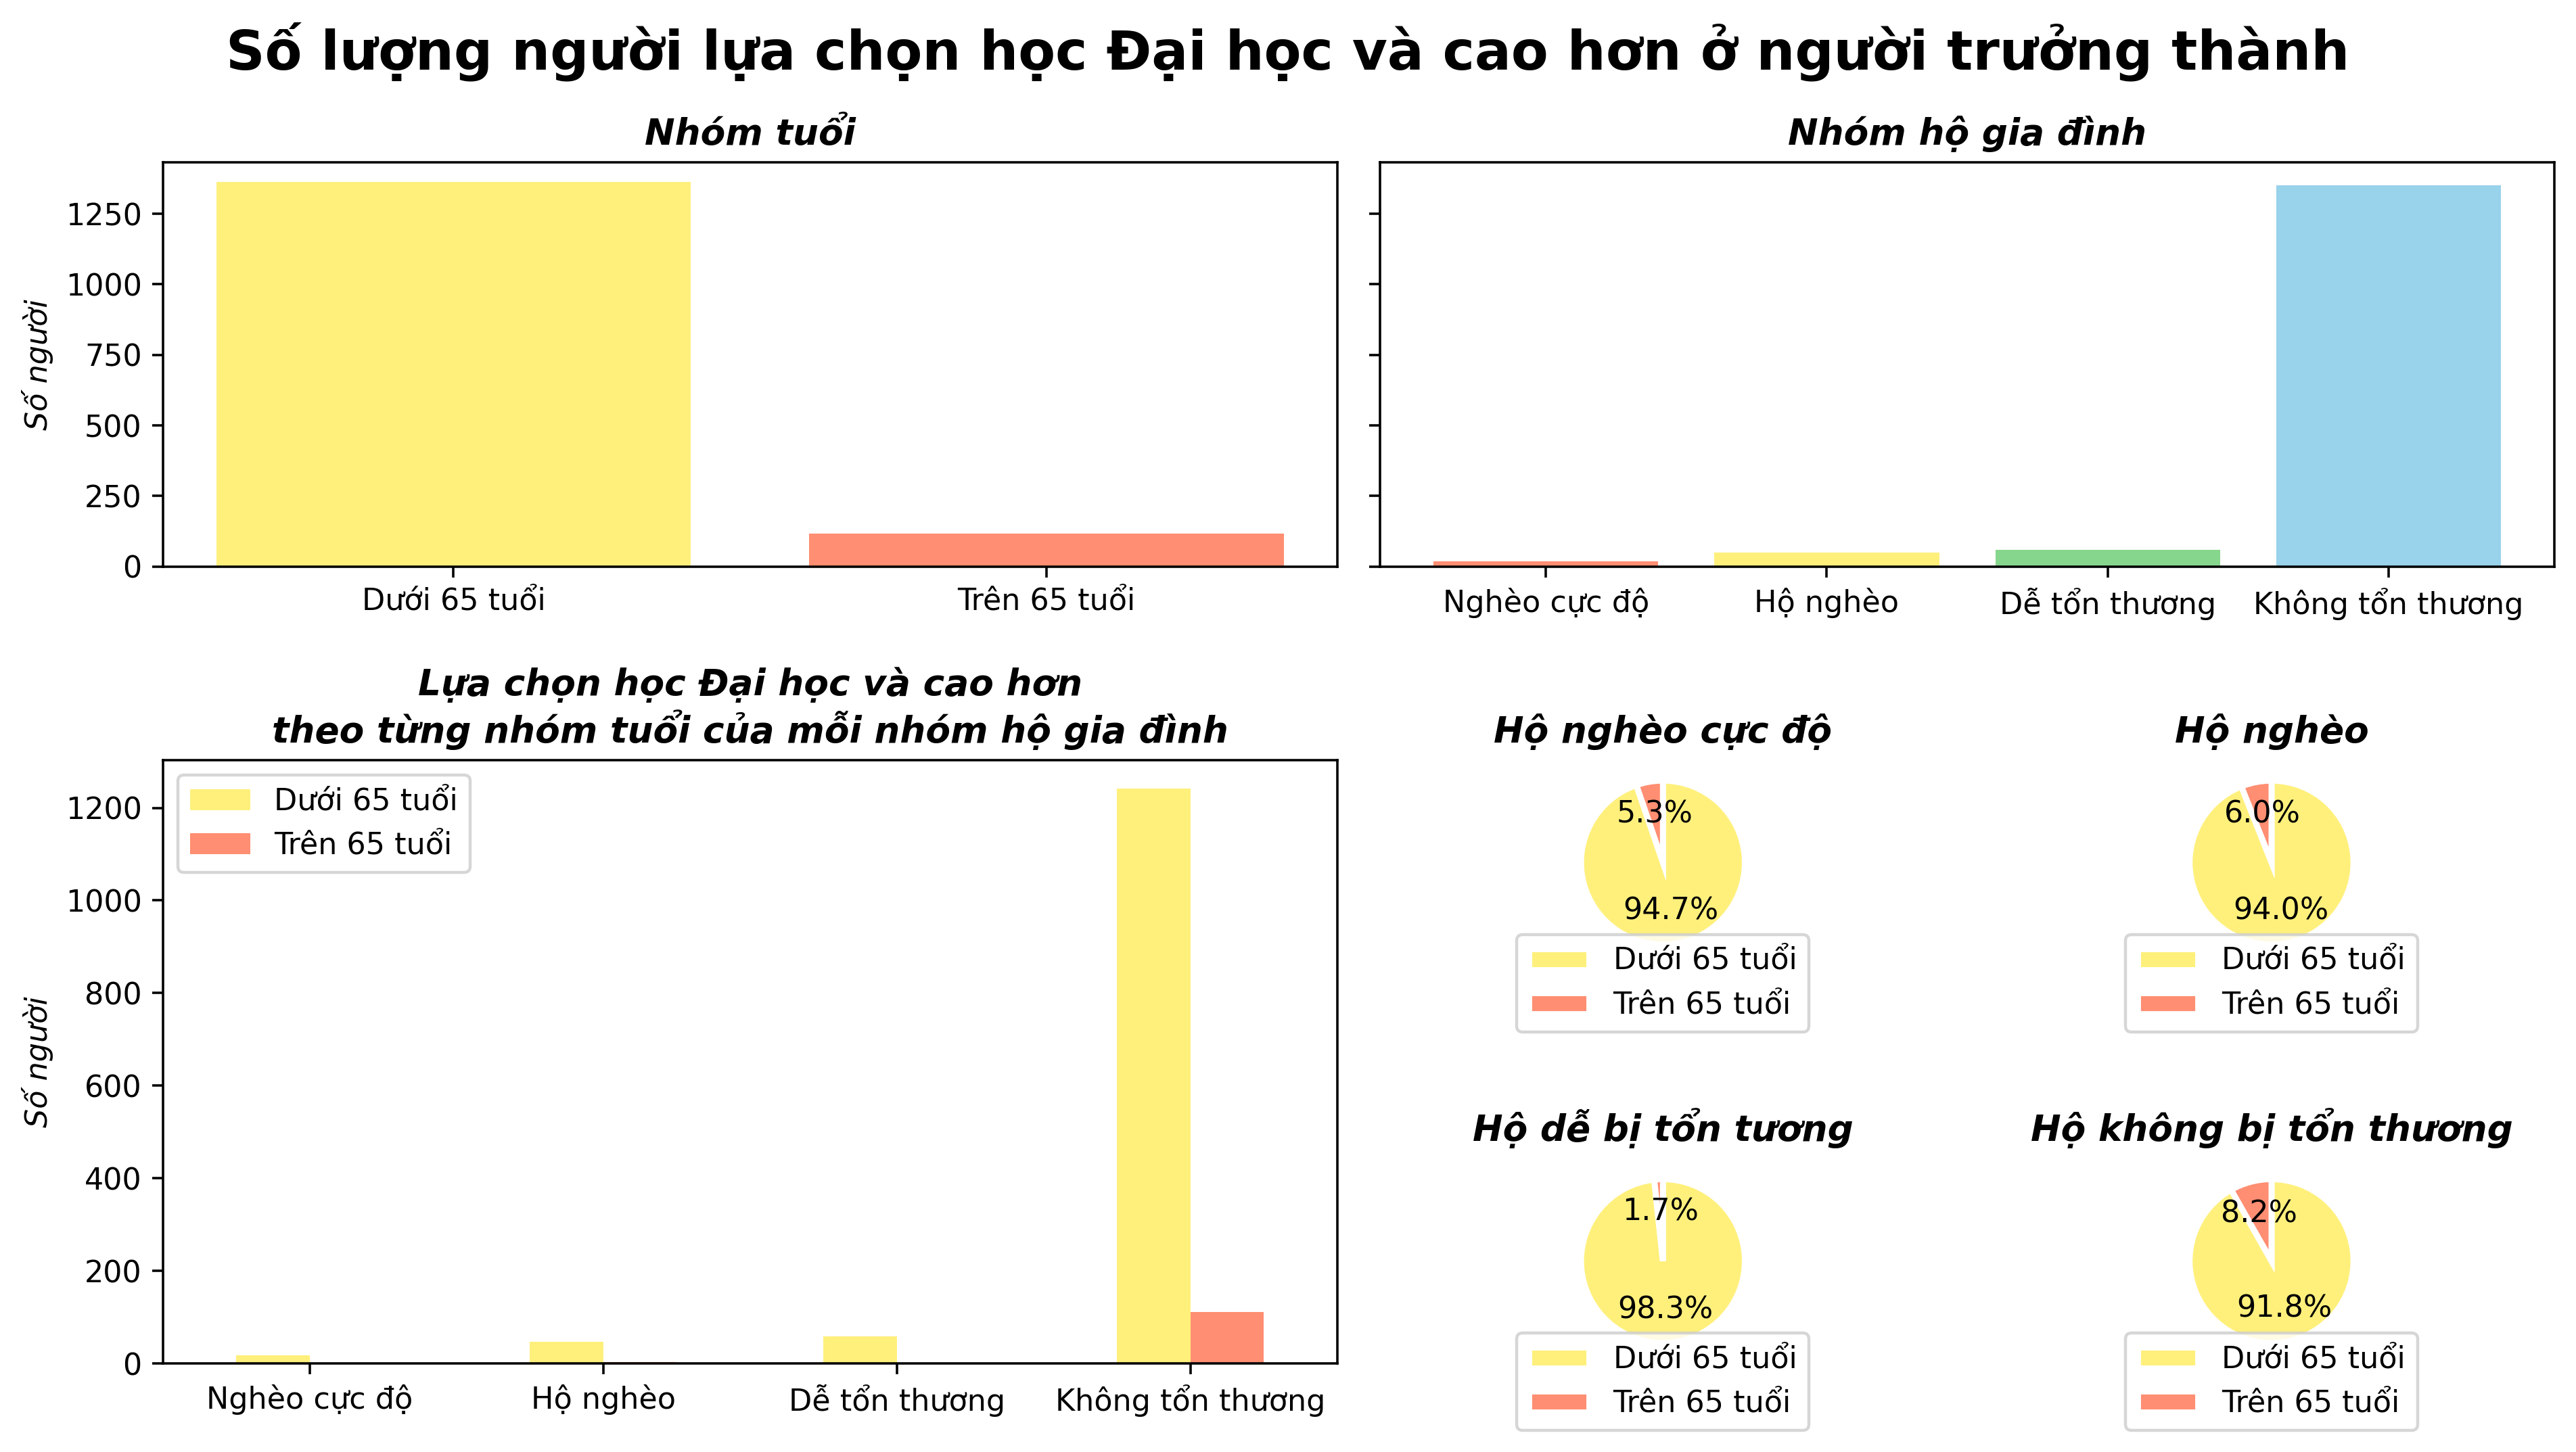

In [24]:
# Plot bar chart for 'meaneduc' with 'bin_age' and 'Target' of average_schooling
fig = plt.figure()

gs = fig.add_gridspec(7,4)
ax_left = fig.add_subplot(gs[:3, 0:2])
ax_right = fig.add_subplot(gs[:3, 2:4], sharey=ax_left)
ax_pie = fig.add_subplot(gs[3:, :2])
ax_pie_1 = fig.add_subplot(gs[3:5, 2])
ax_pie_2 = fig.add_subplot(gs[3:5, 3])
ax_pie_3 = fig.add_subplot(gs[5:, 2])
ax_pie_4 = fig.add_subplot(gs[5:, 3])

# Box plot
plt.suptitle('Số lượng người lựa chọn học Đại học và cao hơn ở người trưởng thành', weight='bold', fontsize=18);
ax_left.set_title('Nhóm tuổi',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});
ax_right.set_title('Nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

color_lst = ['#fff07c', '#FF8E72']
ax_left.bar(sum_by_age.index, sum_by_age.has_uni_grad, color=color_lst);
color_lst = ['#FF8E72', '#fff07c', '#87D68D', '#98d2eb']
ax_right.bar(sum_by_target.index, sum_by_target.has_uni_grad, color=color_lst);

ax_right.set_xticks([1, 2, 3, 4]);
ax_right.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_left.set_ylabel('Số người', style='italic');

color_lst = ['#fff07c', '#FF8E72']
ax_pie_1.pie(sum_group_pie[1],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_1.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_1.set_title('Hộ nghèo cực độ',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_pie_2.pie(sum_group_pie[2],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_2.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_2.set_title('Hộ nghèo',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_pie_3.pie(sum_group_pie[3],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_3.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_3.set_title('Hộ dễ bị tổn tương',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_pie_4.pie(sum_group_pie[4],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_4.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_4.set_title('Hộ không bị tổn thương',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

sum_group.plot(kind='bar', ax=ax_pie, color=['#fff07c', '#FF8E72']);
ax_pie.set_xlabel('');
ax_pie.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_pie.set_ylabel('Số người', style='italic');
ax_pie.set_title('Lựa chọn học Đại học và cao hơn\ntheo từng nhóm tuổi của mỗi nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

plt.tight_layout();

**Nhận xét**:
- Từ biểu đồ ta thấy người dưới 65 tuổi chiếm tỷ lệ rất lớn (trên $90\%$) dù cho quan sát trên tổng thể hay từng nhóm hộ gia đình. Cho thấy đa số người trẻ ở Costa Rica chú trọng việc học Đại học hơn những người cao tuổi.
- Xu hướng số người lựa chọn tăng theo chiều điều kiện kinh tế các hộ gia đình tăng. Quan sát biểu đồ ta thấy phần lớn ảnh hưởng từ những người dưới 65 tuổi, tuy nhiên xu hướng tăng cũng diễn ra với đối tượng trên 65 tuổi. Cho thấy rằng nếu có điều kiện kinh tế, người trưởng thành sẵn sàng cho việc học Đại học.